In [11]:
print("Hello")

Hello


In [12]:
import sys
!{sys.executable} -m pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install install scikit-learn
#!{sys.executable} -m pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


1 : 135.350 seconds
acceleration 1.000 	 efficiency: 1.000
2 : 74.213 seconds
acceleration 1.824 	 efficiency: 0.912
3 : 57.427 seconds
acceleration 2.357 	 efficiency: 0.786
4 : 49.436 seconds
acceleration 2.738 	 efficiency: 0.684
5 : 44.723 seconds
acceleration 3.026 	 efficiency: 0.605
6 : 40.848 seconds
acceleration 3.314 	 efficiency: 0.552
7 : 38.364 seconds
acceleration 3.528 	 efficiency: 0.504
8 : 38.340 seconds
acceleration 3.530 	 efficiency: 0.441
9 : 38.340 seconds
acceleration 3.530 	 efficiency: 0.392
10 : 38.448 seconds
acceleration 3.520 	 efficiency: 0.352
11 : 39.288 seconds
acceleration 3.445 	 efficiency: 0.313
12 : 38.980 seconds
acceleration 3.472 	 efficiency: 0.289
13 : 38.694 seconds
acceleration 3.498 	 efficiency: 0.269
14 : 39.037 seconds
acceleration 3.467 	 efficiency: 0.248
15 : 39.221 seconds
acceleration 3.451 	 efficiency: 0.230
16 : 39.248 seconds
acceleration 3.449 	 efficiency: 0.216
17 : 39.371 seconds
acceleration 3.438 	 efficiency: 0.202
18 : 

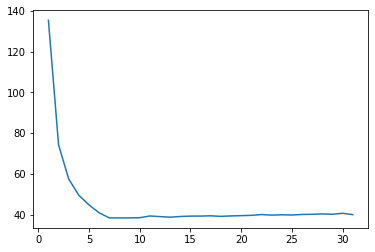

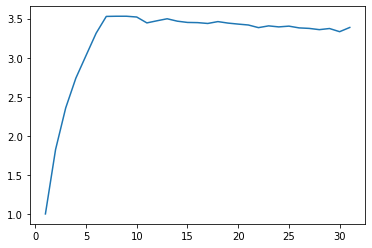

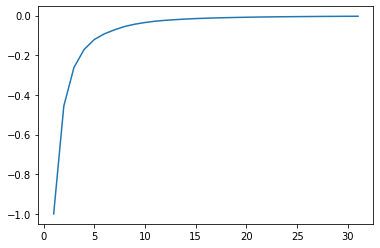

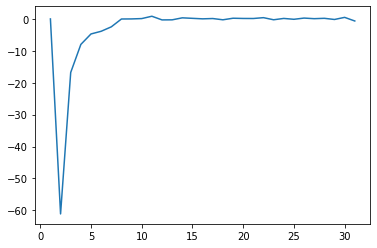

In [15]:
from time import time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
STEP = 1
# define dataset
X, y = make_classification(n_samples=80000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
n_threads = [x for x in range(1, 32, STEP)]
first_time = 0
results = []
accelerations = []
velocities = []
d_results = [0.0]
for x in n_threads:
    # define the model
    model = RandomForestClassifier(n_estimators=500, n_jobs=x)
    # record current time
    start = time()
    # fit the model
    model.fit(X, y)
    # record current time
    end = time()
    # report execution time
    result = end - start
    if x == 1:
        first_time = result
    print('%d : %.3f seconds' % (x, result))
    print('acceleration %.3f \t efficiency: %.3f' % ((first_time/result), (first_time/(result * x))))
    results.append(result)
    accelerations.append(first_time/result)
    velocities.append(-first_time/(result * x * x))
    if x != 1:
        d_results.append((result - results[x-2])/STEP)

pyplot.plot(n_threads, results)
pyplot.show()

pyplot.plot(n_threads, accelerations)
pyplot.show()

pyplot.plot(n_threads, velocities)
pyplot.show()

pyplot.plot(n_threads, d_results)
pyplot.show()

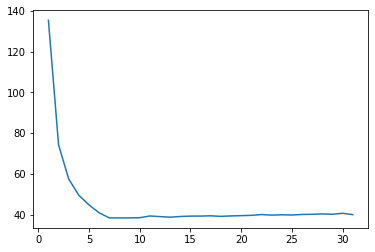

In [16]:
pyplot.plot(n_threads, results)
pyplot.show()

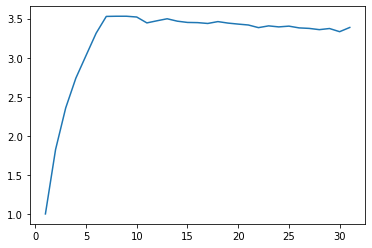

In [17]:
pyplot.plot(n_threads, accelerations)
pyplot.show()

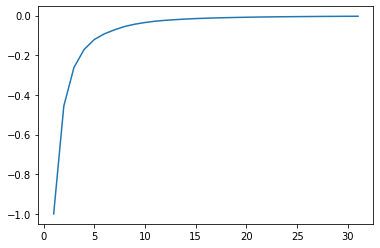

In [18]:
pyplot.plot(n_threads, velocities)
pyplot.show()

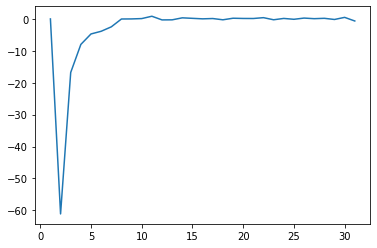

In [19]:
pyplot.plot(n_threads, d_results)
pyplot.show()